In [1]:
%%bash
cd /data1/LLR/GpC/figure5/distance
sfile="GM12878_GpC_20kb.spline_pass1.res20000.significances.txt.gz"
zcat ${sfile} | head -n1 > GM12878_GpC_20kb_FitHiC_Interactions.txt
zcat ${sfile} | awk -v q=1e-3 '{if (($7<q)&&($10>=1)) {print $0}}' >> GM12878_GpC_20kb_FitHiC_Interactions.txt
wc -l  GM12878_GpC_20kb_FitHiC_Interactions.txt
head GM12878_GpC_20kb_FitHiC_Interactions.txt

492220 GM12878_GpC_20kb_FitHiC_Interactions.txt
chr1	fragmentMid1	chr2	fragmentMid2	contactCount	p-value	q-value	bias1	bias2	ExpCC
chr10	10010000	chr10	10050000	63	6.046928e-07	3.772774e-04	7.802731e-01	8.379976e-01	31.673074
chr10	10010000	chr10	10770000	19	7.034231e-07	4.304791e-04	7.802731e-01	9.782383e-01	4.766692
chr10	1010000	chr10	1050000	82	1.389895e-10	2.026399e-07	8.229547e-01	9.301861e-01	37.080584
chr10	1010000	chr18	12910000	10	4.221694e-07	2.757185e-04	8.229547e-01	1.111273e+00	1.158968
chr10	110000	chr10	2390000	11	1.558082e-06	8.510093e-04	8.775720e-01	1.168278e+00	1.671982
chr10	100050000	chr17	44310000	12	9.243376e-07	5.457732e-04	1.244103e+00	1.221040e+00	1.925134
chr10	100070000	chr10	100110000	118	4.772285e-10	6.313717e-07	1.173913e+00	1.110861e+00	63.167874
chr10	100090000	chr10	102430000	29	2.233654e-17	7.772481e-14	1.443080e+00	1.541974e+00	3.494966
chr10	100090000	chr12	53810000	15	1.038907e-08	1.035149e-05	1.443080e+00	1.179424e+00	2.156926


In [2]:
%%bash
cd /data1/LLR/GpC/figure5/distance
sfile="K562_GpC_20kb.spline_pass1.res20000.significances.txt.gz"
zcat ${sfile} | head -n1 > K562_GpC_20kb_FitHiC_Interactions.txt
zcat ${sfile} | awk -v q=1e-3 '{if (($7<q)&&($10>=1)) {print $0}}' >> K562_GpC_20kb_FitHiC_Interactions.txt
wc -l  K562_GpC_20kb_FitHiC_Interactions.txt
head K562_GpC_20kb_FitHiC_Interactions.txt

1620337 K562_GpC_20kb_FitHiC_Interactions.txt
chr1	fragmentMid1	chr2	fragmentMid2	contactCount	p-value	q-value	bias1	bias2	ExpCC
chr10	100010000	chr10	100050000	132	3.111480e-13	2.228870e-10	9.084860e-01	9.460756e-01	65.393546
chr10	100010000	chr10	100150000	59	5.642644e-06	9.110293e-04	9.084860e-01	7.960263e-01	31.143139
chr10	100010000	chr10	100170000	55	2.059117e-08	6.264820e-06	9.084860e-01	6.533608e-01	23.469733
chr10	100010000	chr10	100230000	58	9.946457e-11	4.801684e-08	9.084860e-01	7.550043e-01	21.810982
chr10	100010000	chr10	100830000	21	7.714693e-07	1.596108e-04	9.084860e-01	6.546550e-01	5.758904
chr10	100010000	chr10	102250000	12	1.743076e-06	3.264699e-04	9.084860e-01	8.533089e-01	2.048795
chr10	10010000	chr10	10050000	87	5.891705e-14	4.668693e-11	6.439890e-01	7.063519e-01	34.609109
chr10	10010000	chr10	10110000	47	4.825744e-08	1.350341e-05	6.439890e-01	5.591245e-01	19.047652
chr10	10010000	chr10	10430000	28	3.150016e-07	7.217887e-05	6.439890e-01	7.308319e-01	9.014609


In [3]:
%load_ext rpy2.ipython

In [12]:
'''
FitHiC2 interactions and GpC overlaps
Calculate the significant interactions（q value < 0.001 and ExpCC >=1 ）
'''
import pandas as pd
import numpy as np
import pybedtools
from plotnine import ggplot, aes, geom_boxplot

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams 
rcParams['pdf.fonttype'] = 42 # True font
rcParams['font.size'] =  8  
rcParams['grid.linewidth'] =  0.5 
rcParams['lines.color'] = 'b' 
rcParams['lines.linewidth'] = 1 
rcParams['lines.markersize'] = 3
rcParams['lines.markeredgewidth'] = 0 # set Marker with no edgelines
rcParams['axes.linewidth'] = 0.5
rcParams['axes.titlesize'] = 12
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['legend.title_fontsize'] = 8

In [13]:
# Peak loading and  Interaction loading
peakfile = "/data1/LLR/GpC/figure5/distance/GC_Peaks.txt"
peakdf = pd.read_csv(peakfile, header=0, index_col=None, sep="\t",
                     names=["chrom","start", "end", "ID", "length", "MeanGpC" ], 
                     usecols=[0,1,2,3,4,7])
print( peakdf.head() )

Intactfile = "/data1/LLR/GpC/figure5/distance/GM12878_GpC_20kb_FitHiC_Interactions.txt"
Int_df = pd.read_csv(Intactfile, header=0, sep="\t",
                    usecols=[0,1,2,3,4,9,6])
Int_df

  chrom   start     end             ID  length   MeanGpC
0  chr1   88245   88487   Integrated_8     242  0.305491
1  chr1  625998  626769  Integrated_20     771  0.527585
2  chr1  626885  630644  Integrated_21    3759  0.828216
3  chr1  630710  632301  Integrated_22    1591  0.980163
4  chr1  632367  632813  Integrated_23     446  0.974572


,chr1,fragmentMid1,chr2,fragmentMid2,contactCount,q-value,ExpCC
0,chr10,10010000,chr10,10050000,63,3.772774e-04,31.673074
1,chr10,10010000,chr10,10770000,19,4.304791e-04,4.766692
2,chr10,1010000,chr10,1050000,82,2.026399e-07,37.080584
3,chr10,1010000,chr18,12910000,10,2.757185e-04,1.158968
4,chr10,110000,chr10,2390000,11,8.510093e-04,1.671982
...,...,...,...,...,...,...,...
492214,chrX,99830000,chrX,100390000,21,2.119411e-04,5.437735
492215,chrX,99890000,chrX,99990000,51,9.199041e-04,24.385920
492216,chrX,99910000,chrX,99950000,65,1.997162e-07,26.237421
492217,chrX,99930000,chrX,99970000,53,8.877732e-04,25.710662


In [18]:
# Peak loading and  Interaction loading
peakfile = "/data1/LLR/GpC/figure5/distance/GC_Peaks.txt"
peakdf = pd.read_csv(peakfile, header=0, index_col=None, sep="\t",
                     names=["chrom","start", "end", "ID", "length", "MeanGpC" ], 
                     usecols=[0,1,2,3,4,7])
print( peakdf.head() )

Intactfile = "/data1/LLR/GpC/figure5/distance/GM12878_GpC_20kb_FitHiC_Interactions.txt"
Int_df = pd.read_csv(Intactfile, header=0, sep="\t",
                    usecols=[0,1,2,3,4,9,6])
Int_df

  chrom   start     end             ID  length   MeanGpC
0  chr1   88245   88487   Integrated_8     242  0.305491
1  chr1  625998  626769  Integrated_20     771  0.527585
2  chr1  626885  630644  Integrated_21    3759  0.828216
3  chr1  630710  632301  Integrated_22    1591  0.980163
4  chr1  632367  632813  Integrated_23     446  0.974572


,chr1,fragmentMid1,chr2,fragmentMid2,contactCount,q-value,ExpCC
0,chr10,10010000,chr10,10050000,63,3.772774e-04,31.673074
1,chr10,10010000,chr10,10770000,19,4.304791e-04,4.766692
2,chr10,1010000,chr10,1050000,82,2.026399e-07,37.080584
3,chr10,1010000,chr18,12910000,10,2.757185e-04,1.158968
4,chr10,110000,chr10,2390000,11,8.510093e-04,1.671982
...,...,...,...,...,...,...,...
492214,chrX,99830000,chrX,100390000,21,2.119411e-04,5.437735
492215,chrX,99890000,chrX,99990000,51,9.199041e-04,24.385920
492216,chrX,99910000,chrX,99950000,65,1.997162e-07,26.237421
492217,chrX,99930000,chrX,99970000,53,8.877732e-04,25.710662


In [19]:
# Summary contact distance
'''
1. Cis and Trans contacts
'''

CisP = Int_df["chr1"] == Int_df["chr2"]
print("GM12878 FitHiC2 interactions:\t", len(Int_df) )
print("Cis- interactions:\t", sum(CisP) )
print("Trans- interactions:\t", len(Int_df) - sum(CisP)  )

GM12878 FitHiC2 interactions:	 492219
Cis- interactions:	 444307
Trans- interactions:	 47912


In [20]:
def Intersectdf(df_A, df_B):
    '''
    A(FitHic2 anchro), B dataframe(GpC peaks) intersection, with B 100% intersect with A
    '''
    # 将DataFrame转换为pybedtools的bedtool对象
    a = pybedtools.BedTool.from_dataframe(df_A.loc[:, ['chrom', 'start', 'end', 'ID'] ])
    b = pybedtools.BedTool.from_dataframe(peakdf)
    overlap_ab = a.intersect(b, wa=True, wb=True,  F=1.0 )
    result = overlap_ab.to_dataframe()
    pybedtools.cleanup()
    aIDs = result["name"].values
    bIDs = result["thickEnd"].values
    return(aIDs, bIDs)
    

# Overlap with GpC peaks
Int_cis_df = Int_df.loc[CisP,:].reset_index(drop=True).copy()
Int_cis_df["f1op"] = ""
Int_cis_df["f2op"] = ""
resolution = 20000

# Ancord1    
df_A = Int_cis_df.loc[:, ["chr1", "fragmentMid1"] ]              
df_A["start1"] = Int_cis_df["fragmentMid1"] - resolution//2
df_A["end1"] = Int_cis_df["fragmentMid1"] + resolution//2
df_A["ID"] = df_A.index.values
df_A.columns = ['chrom','fragmentMid1', 'start', 'end', 'ID']
aIDs, bIDs = Intersectdf(df_A, peakdf)
Int_cis_df.loc[aIDs, "f1op"] = bIDs

# Ancord2    
df_A = Int_cis_df.loc[:, ["chr2", "fragmentMid2"] ]              
df_A["start2"] = Int_cis_df["fragmentMid2"] - resolution//2
df_A["end2"] = Int_cis_df["fragmentMid2"] + resolution//2
df_A["ID"] = df_A.index.values
df_A.columns = ['chrom','fragmentMid1', 'start', 'end', 'ID']
aIDs, bIDs = Intersectdf(df_A, peakdf)
Int_cis_df.loc[aIDs, "f2op"] = bIDs

/home/llr/miniforge3/envs/pybedtools/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
/home/llr/miniforge3/envs/pybedtools/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used


In [21]:
# None-None, Acc-None, Acc-Acc
Int_cis_df["Ctype"] = "A-N"
Pnn = (Int_cis_df["f1op"] == "") & (Int_cis_df["f2op"] == "")
Int_cis_df.loc[Pnn, "Ctype"] = "N-N"
Paa = (Int_cis_df["f1op"] != "") & (Int_cis_df["f2op"] != "")
Int_cis_df.loc[Paa, "Ctype"] = "A-A"
Int_cis_df["Ctype"].value_counts()

Ctype
N-N    239517
A-N    145322
A-A     59468
Name: count, dtype: int64

In [22]:
# Export
exfile = "GM12878_FitHiC2_Acc_nonAcc_Interactions.csv"
#Int_cis_df = pd.read_csv(exfile, sep="\t", header=0, index_col=None)
Int_cis_df["distance"] = (Int_cis_df["fragmentMid2"] - Int_cis_df["fragmentMid1"]).abs()
Int_cis_df["Enrichment"] = Int_cis_df["contactCount"].values / Int_cis_df["ExpCC"].values 
Int_cis_df.to_csv(exfile, sep="\t", index=False, header=True)
Int_cis_df

,chr1,fragmentMid1,chr2,fragmentMid2,contactCount,q-value,ExpCC,f1op,f2op,Ctype,distance,Enrichment
0,chr10,10010000,chr10,10050000,63,3.772774e-04,31.673074,,,N-N,40000,1.989071
1,chr10,10010000,chr10,10770000,19,4.304791e-04,4.766692,,,N-N,760000,3.985993
2,chr10,1010000,chr10,1050000,82,2.026399e-07,37.080584,,Integrated_12739,A-N,40000,2.211400
3,chr10,110000,chr10,2390000,11,8.510093e-04,1.671982,,,N-N,2280000,6.579018
4,chr10,100070000,chr10,100110000,118,6.313717e-07,63.167874,,,N-N,40000,1.868038
...,...,...,...,...,...,...,...,...,...,...,...,...
444302,chrX,99830000,chrX,100390000,21,2.119411e-04,5.437735,,,N-N,560000,3.861902
444303,chrX,99890000,chrX,99990000,51,9.199041e-04,24.385920,,,N-N,100000,2.091371
444304,chrX,99910000,chrX,99950000,65,1.997162e-07,26.237421,,,N-N,40000,2.477378
444305,chrX,99930000,chrX,99970000,53,8.877732e-04,25.710662,,,N-N,40000,2.061402


In [23]:
%%R
library(ggplot2)
library(ggsci)
library(gridExtra)
library(tidyr)
library(ggpubr)

In [24]:
%%R -i Int_cis_df
head(Int_cis_df)

   chr1 fragmentMid1  chr2 fragmentMid2 contactCount      q-value     ExpCC
0 chr10     10010000 chr10     10050000           63 3.772774e-04 31.673074
1 chr10     10010000 chr10     10770000           19 4.304791e-04  4.766692
2 chr10      1010000 chr10      1050000           82 2.026399e-07 37.080584
3 chr10       110000 chr10      2390000           11 8.510093e-04  1.671982
4 chr10    100070000 chr10    100110000          118 6.313717e-07 63.167874
5 chr10    100090000 chr10    102430000           29 7.772481e-14  3.494966
  f1op             f2op Ctype distance Enrichment
0                         N-N    40000   1.989071
1                         N-N   760000   3.985993
2      Integrated_12739   A-N    40000   2.211400
3                         N-N  2280000   6.579018
4                         N-N    40000   1.868038
5      Integrated_17299   A-N  2340000   8.297649


In [25]:
out_R_dict = {}

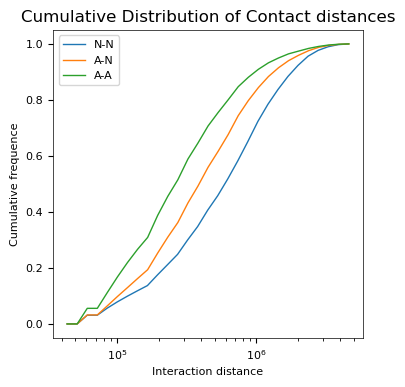

In [26]:
## Contact distance distribution
import numpy as np
import matplotlib.pyplot as plt

# 绘制累积分布函数图
plt.figure(figsize=[4,4])

for typeID in ["N-N", "A-N", "A-A"]:
    Ps = Int_cis_df["Ctype"] == typeID
    Pnum = sum(Ps)
    
    # distance
    data = np.array( (Int_cis_df.loc[Ps, "fragmentMid2"] - Int_cis_df.loc[Ps, "fragmentMid1"]).abs() )
    bins = np.logspace(np.log10(data.min()), np.log10(data.max()), num=30)
    freq, bins = np.histogram(data, bins)
    bin_mids = bins[:-1]+np.diff(bins)/2
    # 计算累计频率
    cumulative_counts = np.cumsum(freq)
    # Normalize cumulative counts to get CDF 
    cdf = cumulative_counts / cumulative_counts.max()
    plt.plot(bin_mids, cdf, label=typeID)
    out_R_dict[typeID] = []
    out_R_dict[typeID].append(bin_mids)
    out_R_dict[typeID].append(cdf)
    # Distance decave curve 
    #logfreq = np.log10(freq+1)
    #plt.plot(bin_mids, logfreq, label=typeID)
    
plt.gca().set_xscale("log")
plt.xlabel('Interaction distance')
plt.ylabel('Cumulative frequence')
plt.legend(["N-N", "A-N", "A-A"], loc='upper left')
plt.title('Cumulative Distribution of Contact distances')
plt.show()

In [27]:
N_N_df = pd.DataFrame(out_R_dict['N-N']).T
N_N_df[2] = 'N-N'
N_N_df.columns = ['bin_mids', 'cdf', 'type']

In [28]:
A_N_df = pd.DataFrame(out_R_dict['A-N']).T
A_N_df[2] = 'A-N'
A_N_df.columns = ['bin_mids', 'cdf', 'type']

In [29]:
A_A_df = pd.DataFrame(out_R_dict['A-A']).T
A_A_df[2] = 'A-A'
A_A_df.columns = ['bin_mids', 'cdf', 'type']

In [30]:
cumulative_curvedf = pd.concat([N_N_df, A_N_df])
cumulative_curvedf = pd.concat([cumulative_curvedf, A_A_df])

In [31]:
cumulative_curvedf = cumulative_curvedf.reset_index(drop=True)

Saving 6.67 x 6.67 in image


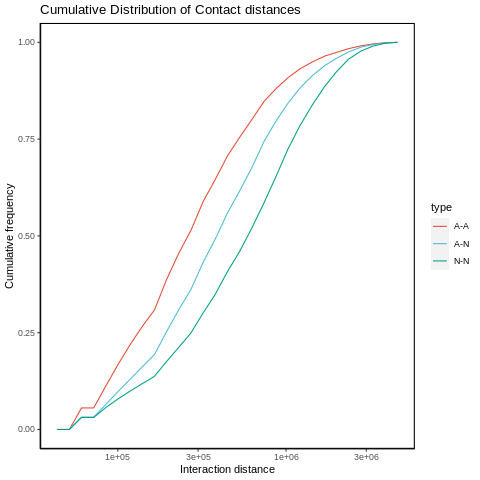

In [32]:
%%R -i cumulative_curvedf
p <- ggplot(cumulative_curvedf, aes(x = bin_mids, y = cdf, color = type)) +
      geom_line() +
      scale_x_log10() +
      labs(x = 'Interaction distance', y = 'Cumulative frequency', title = 'Cumulative Distribution of Contact distances') +
      theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          axis.line = element_line()) +
      scale_color_npg() +
      scale_fill_npg() 
ggsave("/data1/LLR/GpC/figure5/figure/Cumulative_curve.pdf", p, device = "pdf")
p

In [35]:
df

,Ctype,distance,Enrichment,q-value,log10_distance,Significance(-log10(q-value))
0,N-N,40000,1.989071,3.772774e-04,4.602060,3.423339
1,N-N,760000,3.985993,4.304791e-04,5.880814,3.366048
2,A-N,40000,2.211400,2.026399e-07,4.602060,6.693275
3,N-N,2280000,6.579018,8.510093e-04,6.357935,3.070066
4,N-N,40000,1.868038,6.313717e-07,4.602060,6.199715
...,...,...,...,...,...,...
444302,N-N,560000,3.861902,2.119411e-04,5.748188,3.673785
444303,N-N,100000,2.091371,9.199041e-04,5.000000,3.036257
444304,N-N,40000,2.477378,1.997162e-07,4.602060,6.699587
444305,N-N,40000,2.061402,8.877732e-04,4.602060,3.051698


In [64]:
df = Int_cis_df.loc[:, ["Ctype", "distance","Enrichment", 'q-value'] ]
df["log10_distance"] = np.log10( df["distance"].values )
df["Significance(-log10(q-value))"] = -1*np.log10( df["q-value"].values )

/tmp/ipykernel_1260/100454356.py:3: RuntimeWarning: divide by zero encountered in log10


In [65]:
df = df.rename(columns = {
    "Significance(-log10(q-value))": "y"
})

In [66]:
df['y'] = df['y'].replace(np.inf, 275)
df = df.sort_values('y', ascending=False)
df = df.reset_index()

In [52]:
%%R
df[3:10,]

   index Ctype distance Enrichment       q-value log10_distance        y
1 142936   A-N  3420000 166.273417  0.000000e+00       6.534026      Inf
2 443104   A-N  1940000 131.457344 3.331852e-276       6.287802 275.4773
3 231221   A-A  4340000  96.992042 5.927316e-236       6.637490 235.2271
4 143097   A-A  2020000  76.064545 1.004062e-228       6.305351 227.9982
5 142935   A-N  1400000  48.406641 5.216040e-154       6.146128 153.2827
6 389741   A-A  4240000  43.065488 6.583588e-154       6.627366 153.1815
7  88153   N-N  1100000  30.905769 1.081435e-148       6.041393 147.9660
8 356861   N-N    60000   8.295394 2.714281e-148       4.778151 147.5663
9 389739   A-A  3000000  34.632214 1.277016e-147       6.477121 146.8938


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


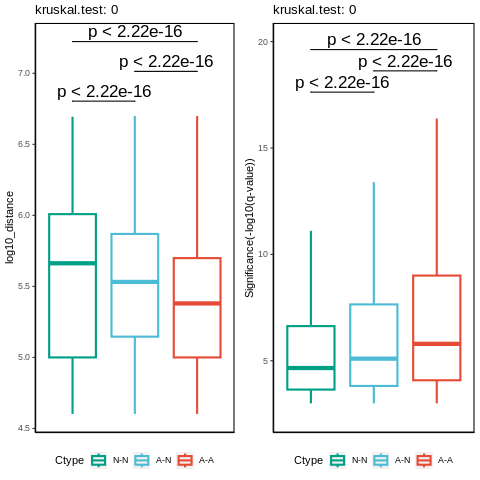

In [105]:
%%R -i df
result_kw <- kruskal.test(log10_distance ~ Ctype, data = df)
colors <- c("#00A087FF", "#4DBBD5FF", "#E64B35FF")
df$Ctype = factor(df$Ctype, levels = c("N-N", "A-N", "A-A"))
p1 <- ggplot(df, aes(x = Ctype, y = log10_distance,  fill = Ctype)) +   
  # geom_violin(scale = "width", width = 0.8, fill=NA,) +
  geom_boxplot(aes(color=Ctype),linewidth=1,fill=NA, outlier.shape = NA) +
  labs(x = "Ctype", y = "log10_distance") +
  geom_signif(
      comparisons = list(c("N-N","A-N"), c("A-N","A-A"), c("N-N","A-A")), map_signif_level = F, 
      test = t.test,step_increase = 0.1, textsize = 6, color = "black",
      tip_length=0) +
  theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.text.x = element_blank(),
          axis.ticks.x = element_blank(),
          axis.title.x = element_blank(),
          panel.background = element_blank(), 
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          axis.line = element_line(),
          legend.position = "bottom") +
  labs(title = sprintf("kruskal.test: %s", result_kw[3])) +
  scale_colour_manual(values = c("#00A087FF", "#4DBBD5FF", "#E64B35FF"))


result_kw <- kruskal.test(y ~ Ctype, data = df)
p2 <- ggplot(df, aes(x = Ctype, y = y,  fill = Ctype)) +   
  geom_boxplot(aes(color=Ctype),linewidth=1,fill=NA, outlier.shape = NA) +
  labs(x = "Ctype", y = "Significance(-log10(q-value))") +
  geom_signif(
      comparisons = list(c("N-N","A-N"), c("A-N","A-A"), c("N-N","A-A")), map_signif_level = FALSE, 
      y_position = c(4, 5, 6),
      test = t.test, textsize = 6, color = "black",
      tip_length=0) +
  scale_y_continuous(limits = c(2.5, 20)) +
  labs(title = sprintf("kruskal.test: %s", result_kw[3])) +
  theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.text.x = element_blank(),
          axis.ticks.x = element_blank(),
          axis.title.x = element_blank(),
          panel.background = element_blank(), 
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          axis.line = element_line(),
          legend.position = "bottom") +
  scale_colour_manual(values =  c("#00A087FF", "#4DBBD5FF", "#E64B35FF")) 
  
p <- grid.arrange(p1, p2, ncol = 2)
# ggsave("/data1/LLR/GpC/figure5/figure/GM_Interaction_acc_nonacc_distance_logq_boxplot.pdf", p, height=6, width=12, device = "pdf")
p